<a href="https://colab.research.google.com/github/chominyeong/2022_s.b.h/blob/main/analysis/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (21.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 124788 files and direc

In [ ]:
# 나눔 바른 고딕 폰트 설정
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

## 주가 + 뉴스 데이터

In [ ]:
stock_news_df = pd.read_csv("/content/drive/MyDrive/성동3기 전Z전능 데이터분석가 과정/python 프로젝트 떡상/가설 검증/stock_news_df.csv")

In [ ]:
stock_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295066 entries, 0 to 295065
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   keyword  295066 non-null  object 
 1   title    295066 non-null  object 
 2   link     295066 non-null  object 
 3   summary  295066 non-null  object 
 4   date     295066 non-null  object 
 5   전처리      295066 non-null  object 
 6   감성점수     295066 non-null  float64
 7   감성결과     295066 non-null  object 
 8   종가       295066 non-null  float64
 9   시가       295066 non-null  float64
 10  고가       295066 non-null  float64
 11  저가       295066 non-null  float64
 12  거래량      295066 non-null  float64
 13  변동 %     295066 non-null  float64
 14  기업명      295066 non-null  object 
dtypes: float64(7), object(8)
memory usage: 33.8+ MB


In [ ]:
# 날짜 format 변경
stock_news_df['date'] = pd.to_datetime(stock_news_df['date'])

In [ ]:
# 반올림
stock_news_df['종가'] = round(stock_news_df['종가'], 2)
stock_news_df['시가'] = round(stock_news_df['시가'], 2)
stock_news_df['고가'] = round(stock_news_df['고가'], 2)
stock_news_df['저가'] = round(stock_news_df['저가'], 2)

In [ ]:
stock_news_df.head(2)

,keyword,title,link,summary,date,전처리,감성점수,감성결과,종가,시가,고가,저가,거래량,변동 %,기업명
0,2차전지,1위 에코프로·2위 SK이노베이션·3위 에코프로비엠...6월 4주차 테마별...,https://www.delighti.co.kr/news/articleView.ht...,In Rankify's stock rechargeable battery secto...,2024-07-01,In Rankify s stock rechargeable battery sector...,0.00,Neutral,250.99,237.25,252.08,235.44,304450.0,6.28,LG 에너지 솔루션
1,전기 자동차,"박정 의원 ""전기차 충전시설에는 반드시 화재 안전설비 """,https://www.safetimes.co.kr/news/articleView.h...,"Recently, a major fire occurred at a primary b...",2024-07-01,"Recently, a major fire occurred at a primary b...",-0.46,Negative,24.22,24.65,24.67,23.55,27000000.0,-2.20,CATL


In [ ]:
# 각 데이터 보기
news = stock_news_df[['keyword', 'summary', 'date', '전처리', '감성점수', '감성결과']].drop_duplicates(keep='first', ignore_index = True)

stock = stock_news_df[['기업명', 'date','종가', '시가', '고가', '저가', '거래량', '변동 %']].drop_duplicates(keep='first', ignore_index = True)

## 뉴스 데이터

#### 뉴스 데이터 확인

In [ ]:
news.head()

,keyword,summary,date,전처리,감성점수,감성결과
0,2차전지,In Rankify's stock rechargeable battery secto...,2024-07-01,In Rankify s stock rechargeable battery sector...,0.00,Neutral
1,전기 자동차,"Recently, a major fire occurred at a primary b...",2024-07-01,"Recently, a major fire occurred at a primary b...",-0.46,Negative
2,전기 자동차,"On this day, the business group ▲Introduced K...",2024-07-01,"On this day, the business group Introduced KC...",0.83,Positive
3,전기 자동차,"According to an Okins Electronics official, t...",2024-07-01,"According to an Okins Electronics official, th...",0.57,Positive
4,전기 자동차,"Specifically, new classification items such a...",2024-07-01,"Specifically, new classification items such as...",0.88,Positive


In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60203 entries, 0 to 60202
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   keyword  60203 non-null  object        
 1   summary  60203 non-null  object        
 2   date     60203 non-null  datetime64[ns]
 3   전처리      60203 non-null  object        
 4   감성점수     60203 non-null  float64       
 5   감성결과     60203 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.8+ MB


#### 🙂 감성결과 전체 분포

In [ ]:
news['감성결과'].value_counts()

,count
감성결과,
Positive,40694
Negative,13989
Neutral,5520


#### 🙂 키워드별 감성결과 분포

0. 추가 전처리

In [ ]:
news['keyword'].value_counts()

,count
keyword,
전기 자동차,11096
일론 머스크,8399
ev,8015
전기차,6462
BYD,4743
2차전지,4102
리튬,3746
테슬라,3522
CATL,2468


In [ ]:
news['keyword'].replace(['전기차', 'ev', 'electric vehicle'], '전기 자동차', inplace=True)
news['keyword'].replace('Elon Musk', '일론 머스크', inplace=True)
news['keyword'].replace('Tesla', '테슬라', inplace=True)
news['keyword'].replace(['LG 엔솔', 'lg energy solution'], 'LG 에너지솔루션', inplace=True)
news['keyword'].replace(['panasonic battery', '파나소닉 배터리'], '파나소닉', inplace=True)
news['keyword'].replace('Lithium', '리튬', inplace=True)

In [ ]:
news['keyword'].value_counts()

,count
keyword,
전기 자동차,27607
일론 머스크,9028
테슬라,4874
BYD,4743
리튬,4294
2차전지,4102
LG 에너지솔루션,2680
CATL,2468
파나소닉,407


In [ ]:
news.head(2)

,keyword,summary,date,전처리,감성점수,감성결과
0,2차전지,In Rankify's stock rechargeable battery secto...,2024-07-01,In Rankify s stock rechargeable battery sector...,0.00,Neutral
1,전기 자동차,"Recently, a major fire occurred at a primary b...",2024-07-01,"Recently, a major fire occurred at a primary b...",-0.46,Negative


1. 키워드별 감성 결과 분포

In [ ]:
# 기업
news.query('keyword in ["BYD", "CATL", "테슬라", "LG 에너지솔루션", "파나소닉"]').groupby('keyword')['감성결과'].value_counts()

keyword    감성결과    
BYD        Positive    3333
           Negative     948
           Neutral      462
CATL       Positive    1526
           Negative     685
           Neutral      257
LG 에너지솔루션  Positive    2443
           Negative     157
           Neutral       80
테슬라        Positive    3124
           Negative    1192
           Neutral      558
파나소닉       Positive     309
           Negative      60
           Neutral       38
Name: count, dtype: int64

In [ ]:
# 키워드별
news.query('keyword in ["전기 자동차", "일론 머스크", "리튬", "2차전지"]').groupby('keyword')['감성결과'].value_counts()

keyword  감성결과    
2차전지     Positive     3382
         Negative      540
         Neutral       180
리튬       Positive     2569
         Negative     1314
         Neutral       411
일론 머스크   Positive     5904
         Negative     2101
         Neutral      1023
전기 자동차   Positive    18104
         Negative     6992
         Neutral      2511
Name: count, dtype: int64

#### 🙂 월별 감성결과 분포

In [ ]:
month_sent = news.groupby([news['date'].dt.month, '감성결과'])['감성결과'].value_counts()
month_sent

date  감성결과    
7     Negative    2645
      Neutral     1078
      Positive    8294
8     Negative    4116
      Neutral     1235
      Positive    7360
9     Negative    1890
      Neutral      597
      Positive    5328
10    Negative    2177
      Neutral     1048
      Positive    7593
11    Negative    1694
      Neutral      872
      Positive    6444
12    Negative    1467
      Neutral      690
      Positive    5675
Name: count, dtype: int64

In [ ]:
month_sent = month_sent.reset_index(name = 'count')


total_by_sent = month_sent.groupby('감성결과')['count'].sum()

month_sent['ratio'] = month_sent.apply(
    lambda row: row['count'] / total_by_sent[row['감성결과']],
    axis=1
)

month_sent

,date,감성결과,count,ratio
0,7,Negative,2645,0.189077
1,7,Neutral,1078,0.195290
2,7,Positive,8294,0.203814
3,8,Negative,4116,0.294231
4,8,Neutral,1235,0.223732
5,8,Positive,7360,0.180862
6,9,Negative,1890,0.135106
7,9,Neutral,597,0.108152
8,9,Positive,5328,0.130928
9,10,Negative,2177,0.155622


from matplotlib import pyplot as plt
month_sent['date'].plot(kind='hist', bins=20, title='date')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_sent['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_sent['ratio'].plot(kind='hist', bins=20, title='ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
month_sent.groupby('감성결과').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_sent.plot(kind='scatter', x='date', y='count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
month_sent.plot(kind='scatter', x='count', y='ratio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = month_sent.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('감성결과')):
  _plot_series(series, series_name, i)
  fig.legend(title='감성결과', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['ratio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = month_sent.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('감성결과')):
  _plot_series(series, series_name, i)
  fig.legend(title='감성결과', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('ratio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = month_sent.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('감성결과')):
  _plot_series(series, series_name, i)
  fig.legend(title='감성결과', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
month_sent['date'].plot(kind='line', figsize=(8, 4), title='date')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
month_sent['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
month_sent['ratio'].plot(kind='line', figsize=(8, 4), title='ratio')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(month_sent['감성결과'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(month_sent, x='date', y='감성결과', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(month_sent['감성결과'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(month_sent, x='count', y='감성결과', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(month_sent['감성결과'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(month_sent, x='ratio', y='감성결과', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

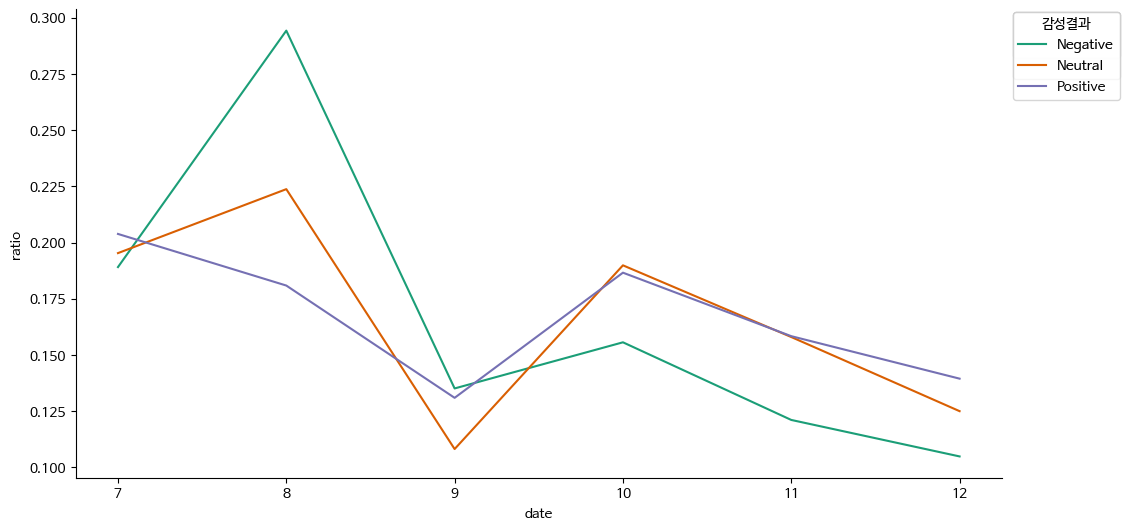

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['ratio']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = month_sent.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('감성결과')):
  _plot_series(series, series_name, i)
  fig.legend(title='감성결과', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('ratio')

In [ ]:
month_sent.query('감성결과 == "Negative"')['ratio'].sum()

1.0

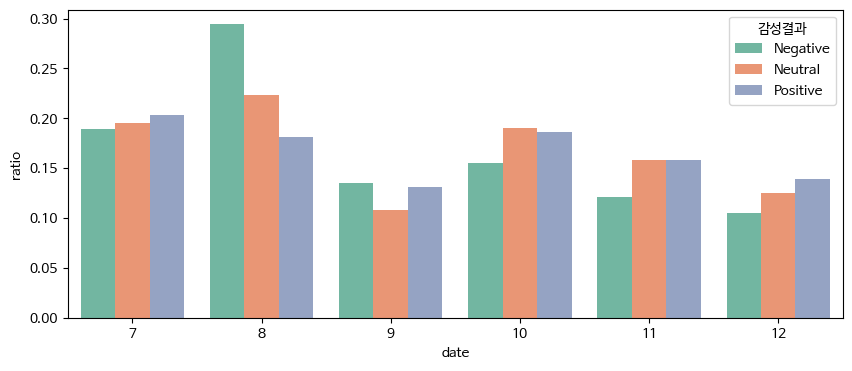

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(data = month_sent, x = 'date', y = 'ratio', hue = '감성결과', palette = 'Set2')
plt.show()

#### 🔡 키워드 전체 분포

In [ ]:
news['keyword'].value_counts()

,count
keyword,
전기 자동차,27607
일론 머스크,9028
테슬라,4874
BYD,4743
리튬,4294
2차전지,4102
LG 에너지솔루션,2680
CATL,2468
파나소닉,407


#### 🔡 월별 키워드 분포

In [ ]:
sorted_grouped = news.groupby([news['date'].dt.month, 'keyword']).size() \
    .groupby(level=0, group_keys=False) \
    .apply(lambda x: x.sort_values(ascending=False)) \
    .reset_index(name='count')

sorted_grouped

,date,keyword,count
0,7,전기 자동차,5917
1,7,일론 머스크,2057
2,7,테슬라,865
3,7,BYD,786
4,7,2차전지,766
5,7,리튬,737
6,7,LG 에너지솔루션,650
7,7,CATL,178
8,7,파나소닉,61
9,8,전기 자동차,5679


In [ ]:
# 각 날짜별로 총합 계산
total_by_keyword = sorted_grouped.groupby('keyword')['count'].sum()

sorted_grouped['ratio'] = sorted_grouped.apply(
    lambda row: row['count'] / total_by_keyword[row['keyword']],
    axis=1
)

sorted_grouped

,date,keyword,count,ratio
0,7,전기 자동차,5917,0.214330
1,7,일론 머스크,2057,0.227847
2,7,테슬라,865,0.177472
3,7,BYD,786,0.165718
4,7,2차전지,766,0.186738
5,7,리튬,737,0.171635
6,7,LG 에너지솔루션,650,0.242537
7,7,CATL,178,0.072123
8,7,파나소닉,61,0.149877
9,8,전기 자동차,5679,0.205709


In [ ]:
sorted_grouped.query('keyword == "전기 자동차"')['ratio'].sum()

1.0

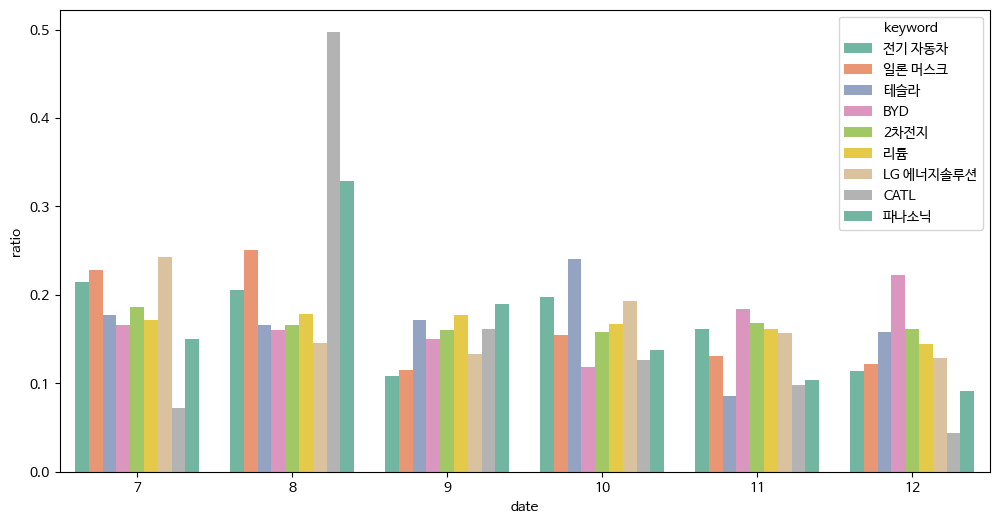

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data = sorted_grouped, x = 'date', y = 'ratio', hue = 'keyword', palette = 'Set2')
plt.show()

#### 🙂🔡 월&키워드별 감성결과 분포

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
news.groupby([news['date'].dt.month, 'keyword', '감성결과'])['감성결과'].value_counts()

date  keyword    감성결과    
7     2차전지       Negative     151
                 Neutral       56
                 Positive     559
      BYD        Negative     142
                 Neutral       54
                 Positive     590
      CATL       Negative      21
                 Neutral       10
                 Positive     147
      LG 에너지솔루션  Negative      49
                 Neutral       15
                 Positive     586
      리튬         Negative     296
                 Neutral       53
                 Positive     388
      일론 머스크     Negative     501
                 Neutral      268
                 Positive    1288
      전기 자동차     Negative    1205
                 Neutral      553
                 Positive    4159
      테슬라        Negative     271
                 Neutral       67
                 Positive     527
      파나소닉       Negative       9
                 Neutral        2
                 Positive      50
8     2차전지       Negative      94
                 Neutral       22
                 Positive     565
      BYD        Negative     183
                 Neutral      117
                 Positive     460
      CATL       Negative     429
                 Neutral      146
                 Positive     653
      LG 에너지솔루션  Negative      26
                 Neutral       25
                 Positive     339
      리튬         Negative     381
                 Neutral       55
                 Positive     332
      일론 머스크     Negative     691
                 Neutral      294
                 Positive    1275
      전기 자동차     Negative    1925
                 Neutral      465
                 Positive    3289
      테슬라        Negative     367
                 Neutral       89
                 Positive     355
      파나소닉       Negative      20
                 Neutral       22
                 Positive      92
9     2차전지       Negative      70
                 Neutral       31
                 Positive     556
      BYD        Negative     130
                 Neutral       57
                 Positive     523
      CATL       Negative     102
                 Neutral       35
                 Positive     261
      LG 에너지솔루션  Negative      15
                 Neutral       11
                 Positive     332
      리튬         Negative     250
                 Neutral       57
                 Positive     456
      일론 머스크     Negative     273
                 Neutral      102
                 Positive     660
      전기 자동차     Negative     902
                 Neutral      196
                 Positive    1882
      테슬라        Negative     140
                 Neutral      101
                 Positive     596
      파나소닉       Negative       8
                 Neutral        7
                 Positive      62
10    2차전지       Negative      59
                 Neutral       29
                 Positive     558
      BYD        Negative     114
                 Neutral       49
                 Positive     398
      CATL       Negative      69
                 Neutral       26
                 Positive     218
      LG 에너지솔루션  Negative      25
                 Neutral       14
                 Positive     477
      리튬         Negative     162
                 Neutral      125
                 Positive     430
      일론 머스크     Negative     294
                 Neutral      157
                 Positive     944
      전기 자동차     Negative    1256
                 Neutral      501
                 Positive    3683
      테슬라        Negative     189
                 Neutral      144
                 Positive     841
      파나소닉       Negative       9
                 Neutral        3
                 Positive      44
11    2차전지       Negative      65
                 Neutral       22
                 Positive     603
      BYD        Negative     153
                 Neutral      105
                 Positive     615
      CATL       Negative      37
                 Neutral       26
                 Positive     

In [ ]:
pd.reset_option('display.max_rows')

#### 월별 전체 분포

In [ ]:
news['date'].dt.month.value_counts().sort_index()

,count
date,
7,12017
8,12711
9,7815
10,10818
11,9010
12,7832


In [ ]:
news['date'].dt.month.value_counts().mean()

10033.833333333334

## 주가 데이터

In [ ]:
stock.head()

,기업명,date,종가,시가,고가,저가,거래량,변동 %
0,LG 에너지 솔루션,2024-07-01,250.99,237.25,252.08,235.44,304450.0,6.28
1,CATL,2024-07-01,24.22,24.65,24.67,23.55,27000000.0,-2.20
2,테슬라,2024-07-01,209.86,201.02,213.23,200.85,135690000.0,6.05
3,파나소닉,2024-07-01,8.16,8.26,8.26,8.14,7920000.0,0.08
4,BYD,2024-07-01,33.96,34.43,34.65,33.36,12930000.0,-1.38


In [ ]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기업명     608 non-null    object        
 1   date    608 non-null    datetime64[ns]
 2   종가      608 non-null    float64       
 3   시가      608 non-null    float64       
 4   고가      608 non-null    float64       
 5   저가      608 non-null    float64       
 6   거래량     608 non-null    float64       
 7   변동 %    608 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 38.1+ KB


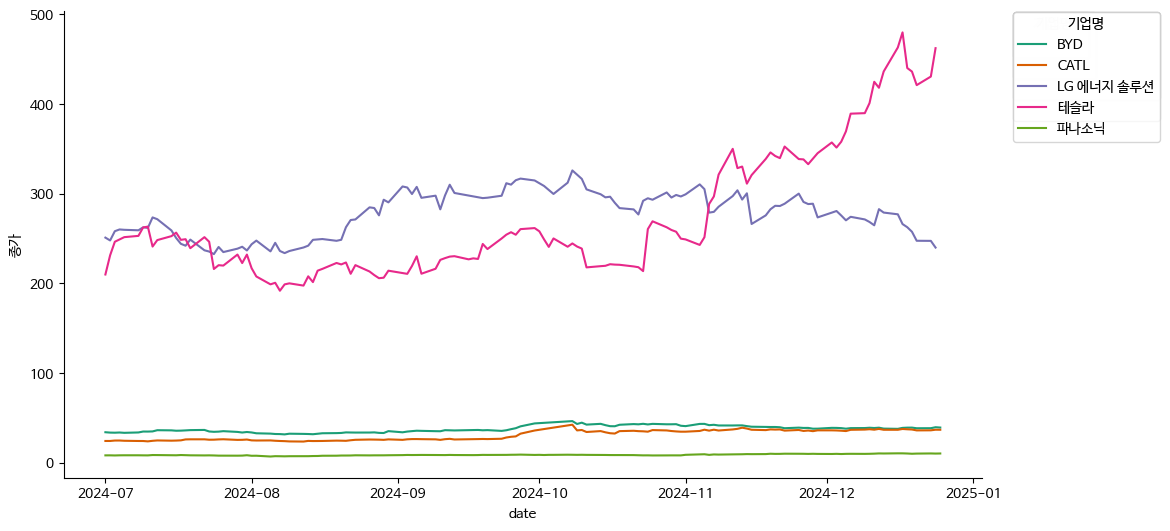

In [ ]:
# @title date vs 종가

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['종가']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('기업명')):
  _plot_series(series, series_name, i)
  fig.legend(title='기업명', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('종가')

기업별 더 자세히 보기

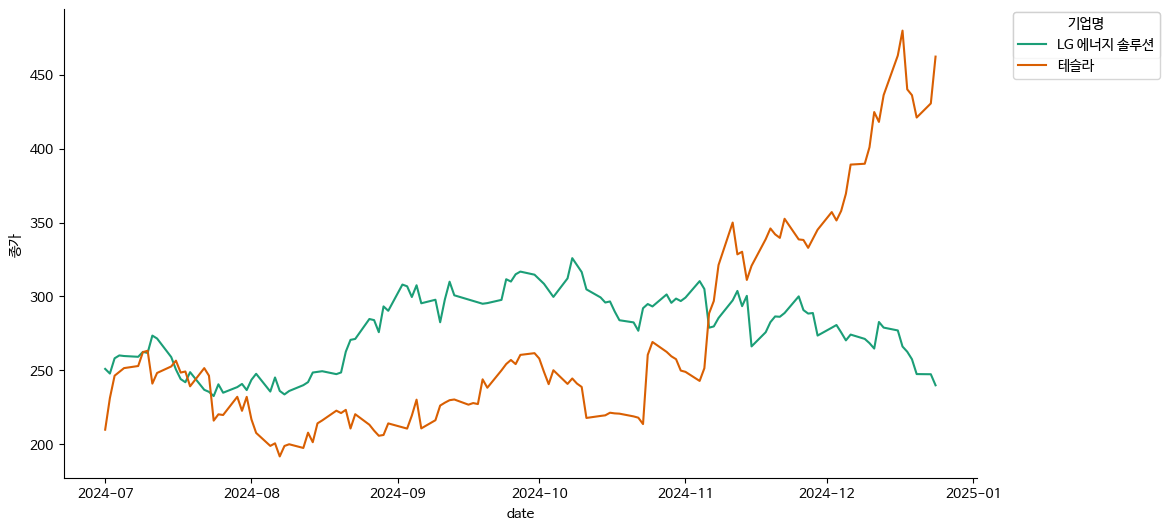

In [ ]:
## 1. 주가 100달러 이상
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['종가']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock.query('기업명 in ["LG 에너지 솔루션", "테슬라"]').sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('기업명')):
  _plot_series(series, series_name, i)
  fig.legend(title='기업명', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('종가')

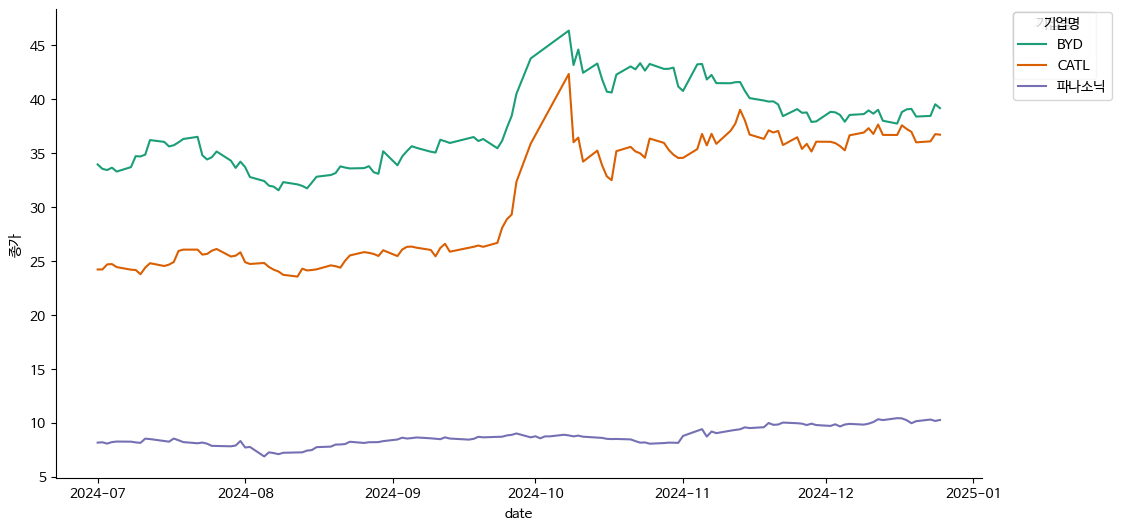

In [ ]:
## 2. 주가 100달러 미만
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['종가']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = stock.query('기업명 in ["CATL", "BYD", "파나소닉"]').sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('기업명')):
  _plot_series(series, series_name, i)
  fig.legend(title='기업명', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('종가')

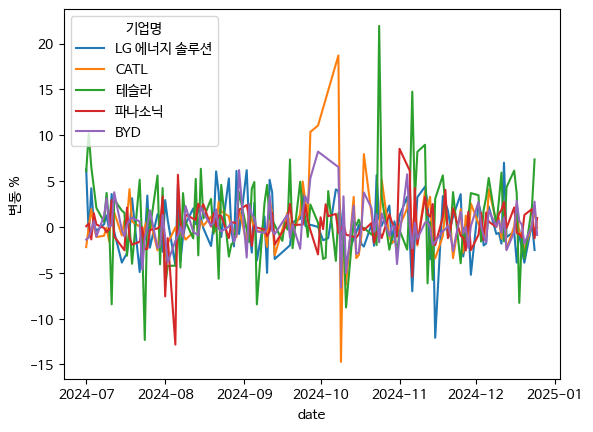

In [ ]:
sns.lineplot(data = stock, x = 'date', y = '변동 %', hue = '기업명')
plt.show()

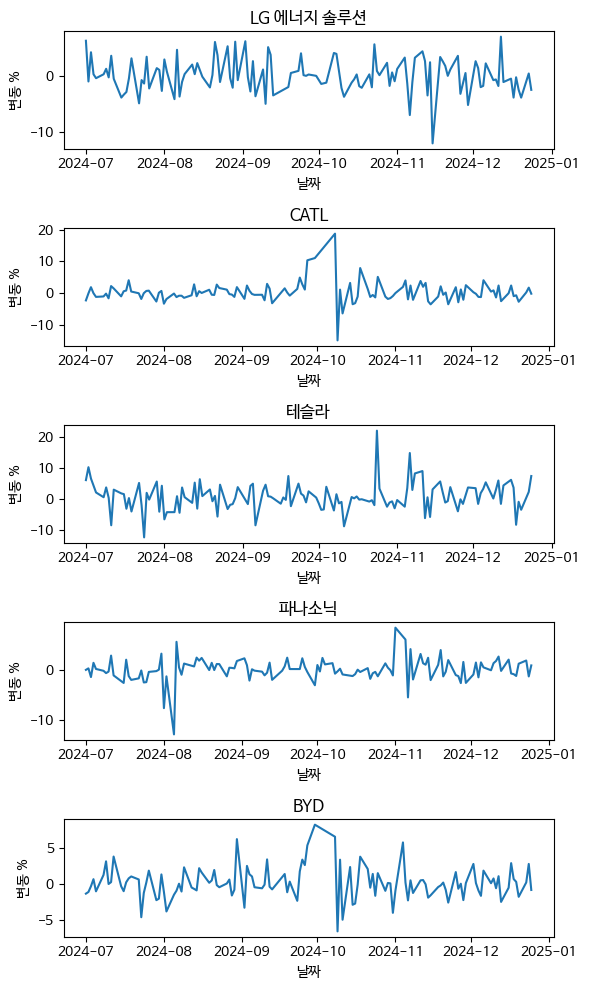

In [ ]:
# 5개의 서브플롯을 생성 (행 5, 열 1)
fig, axes = plt.subplots(5, 1, figsize=(6, 10))

# 각 서브플롯에 대해 '기업명'별로 lineplot 그리기
for i, 기업명 in enumerate(stock['기업명'].unique()):
    ax = axes[i]
    sns.lineplot(data=stock[stock['기업명'] == 기업명], x='date', y='변동 %', ax=ax)
    ax.set_title(기업명)  # 각 서브플롯에 제목 추가
    ax.set_xlabel('날짜')  # x축 레이블 추가
    ax.set_ylabel('변동 %')  # y축 레이블 추가

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()